In [74]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import io
import requests
import plotly as px
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
import warnings; warnings.simplefilter('ignore')

In [19]:
nRowsRead = 1000

df=pd.read_csv('bank-additional-full.csv',delimiter=';', nrows = nRowsRead)

In [20]:
df.head(4)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no


In [21]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [23]:
df.count()

age               1000
job               1000
marital           1000
education         1000
default           1000
housing           1000
loan              1000
contact           1000
month             1000
day_of_week       1000
duration          1000
campaign          1000
pdays             1000
previous          1000
poutcome          1000
emp.var.rate      1000
cons.price.idx    1000
cons.conf.idx     1000
euribor3m         1000
nr.employed       1000
y                 1000
dtype: int64

In [24]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [32]:
df.dtypes

age                  int64
job                 object
marital             object
education           object
default             object
housing             object
loan                object
contact             object
month               object
day_of_week         object
duration             int64
campaign             int64
pdays                int64
previous             int64
poutcome            object
emp.var.rate       float64
cons.price.idx     float64
cons.conf.idx      float64
euribor3m          float64
nr.employed          int64
y                   object
AgeBins           category
dtype: object

In [26]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,1000.000000,1000.000000,1000.000000,1000.0,1000.0,1.000000e+03,1.000000e+03,1.000000e+03,1000.000000,1000.0
mean,42.394000,269.402000,1.667000,999.0,0.0,1.100000e+00,9.399400e+01,-3.640000e+01,4.856756,5191.0
std,8.624799,232.948014,0.898286,0.0,0.0,8.664073e-15,1.236963e-12,6.824623e-13,0.000430,0.0
min,22.000000,5.000000,1.000000,999.0,0.0,1.100000e+00,9.399400e+01,-3.640000e+01,4.856000,5191.0
25%,36.000000,135.000000,1.000000,999.0,0.0,1.100000e+00,9.399400e+01,-3.640000e+01,4.857000,5191.0
50%,42.000000,209.000000,1.000000,999.0,0.0,1.100000e+00,9.399400e+01,-3.640000e+01,4.857000,5191.0
75%,49.000000,328.250000,2.000000,999.0,0.0,1.100000e+00,9.399400e+01,-3.640000e+01,4.857000,5191.0
max,60.000000,2033.000000,7.000000,999.0,0.0,1.100000e+00,9.399400e+01,-3.640000e+01,4.857000,5191.0


In [27]:
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

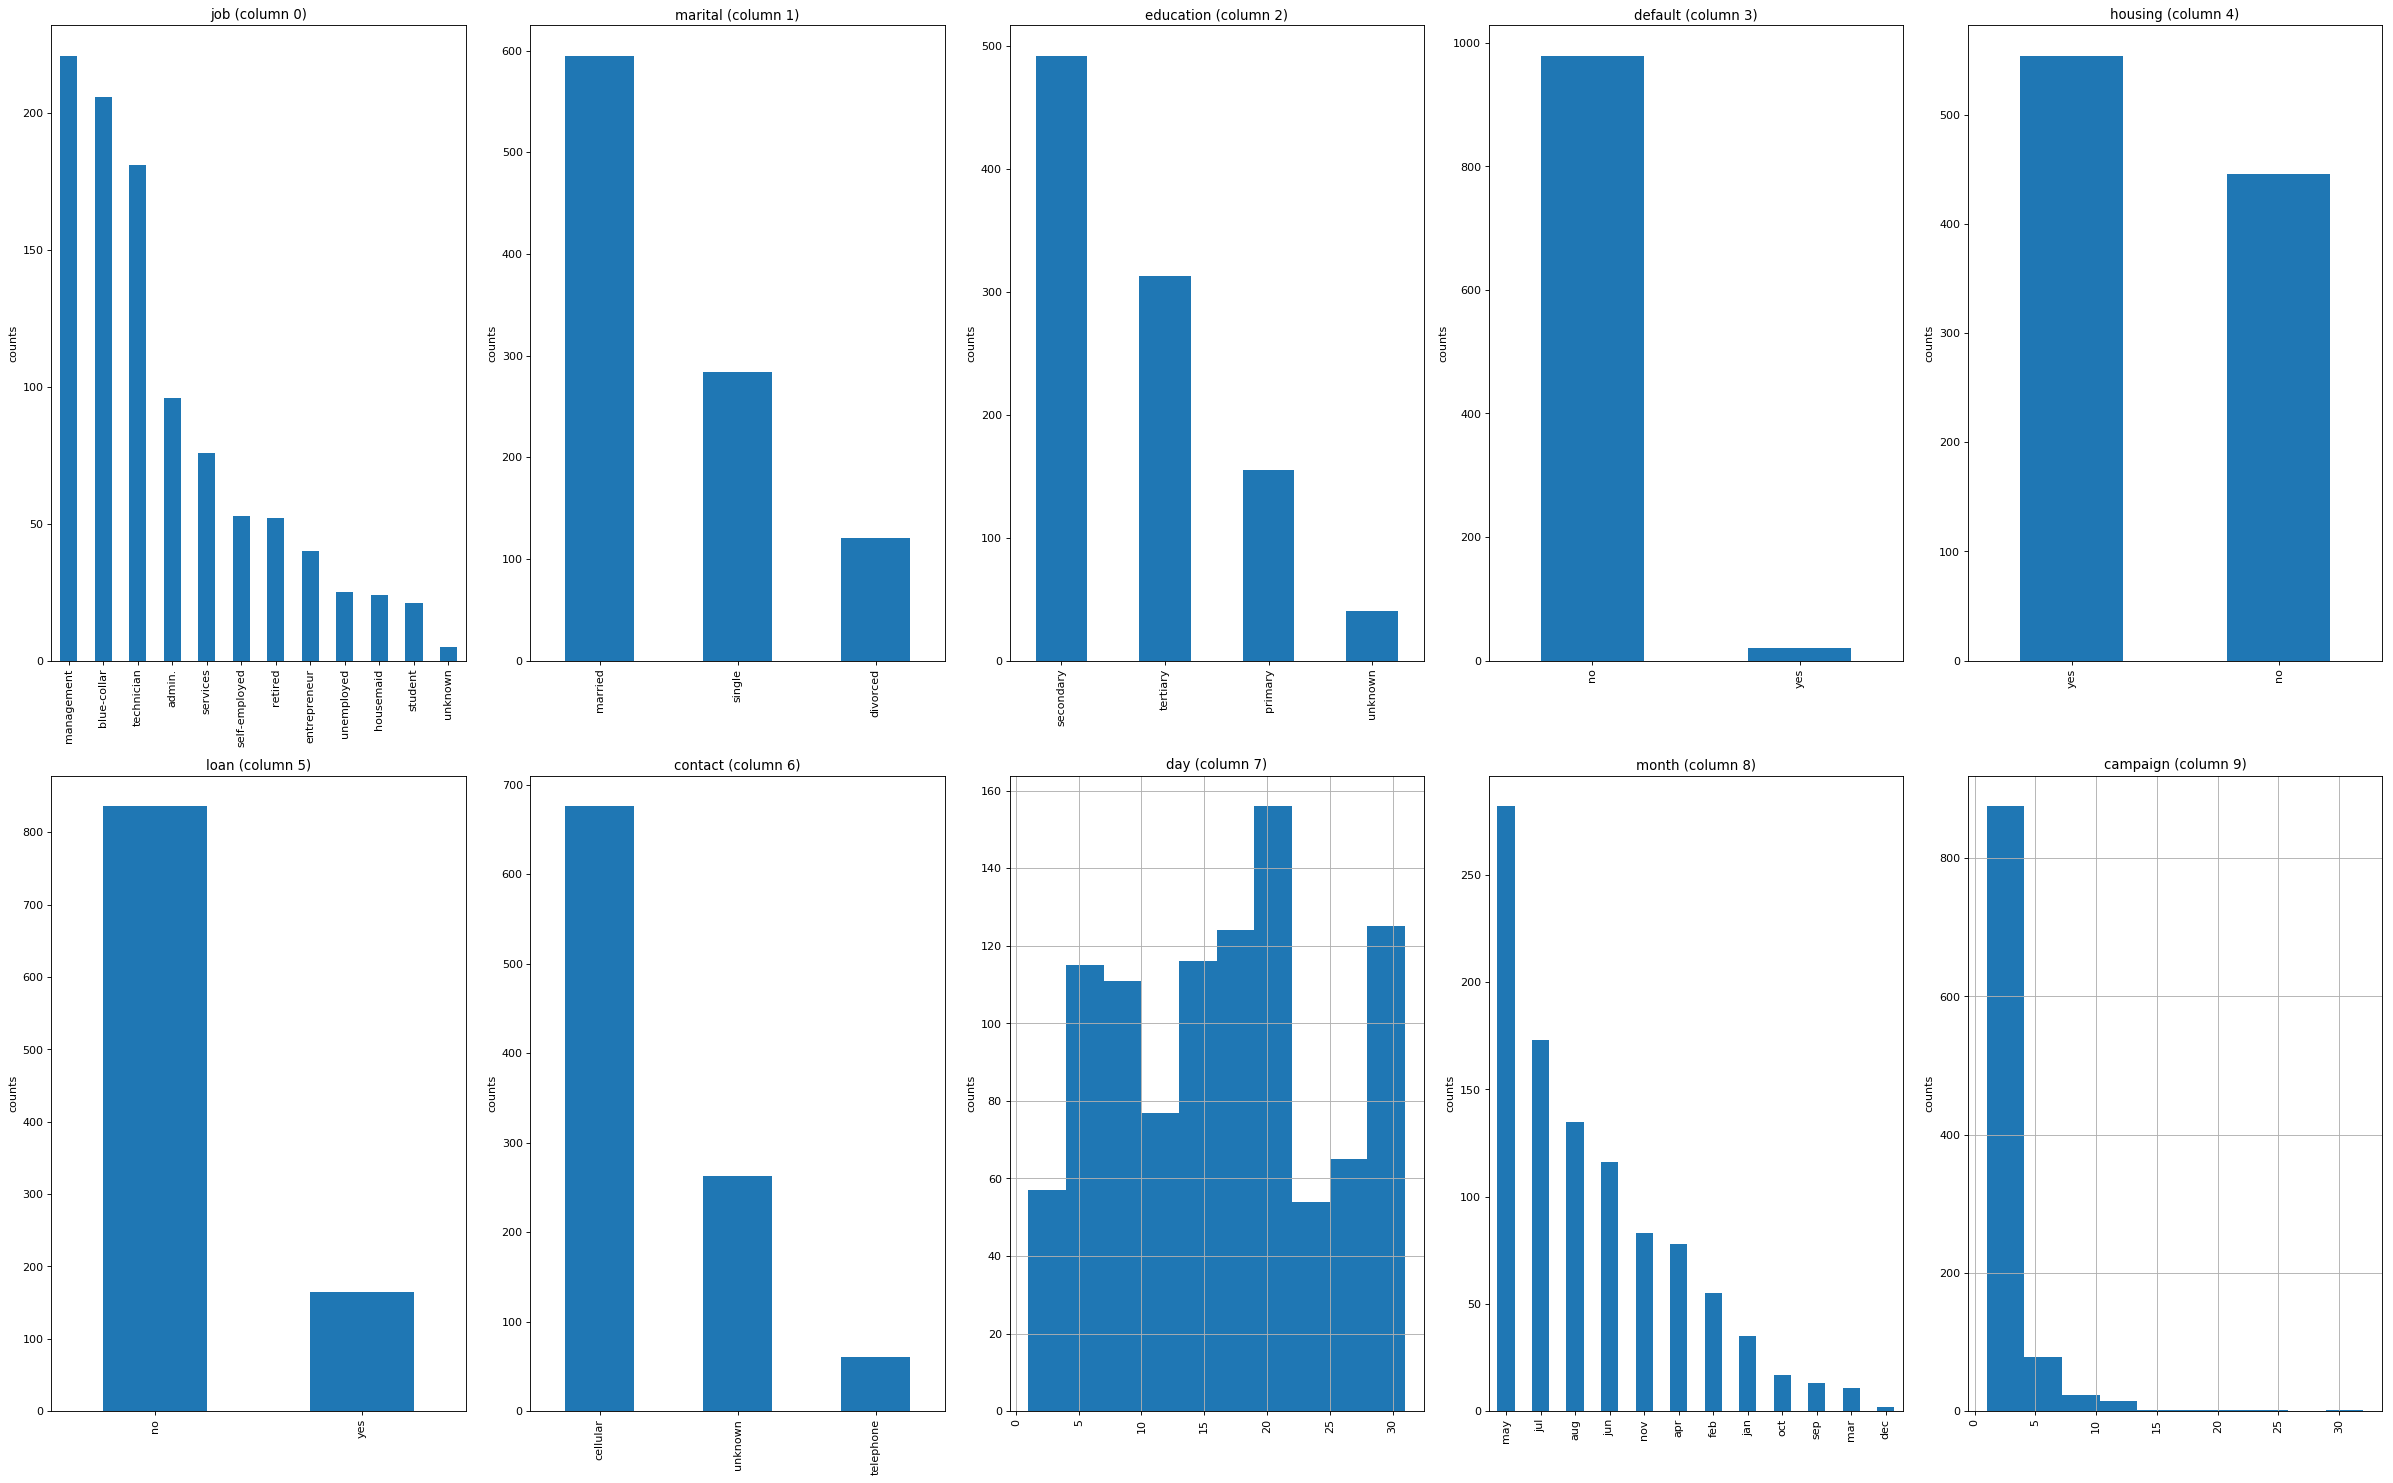

In [28]:
plotPerColumnDistribution(df1, 10, 5)

C:\Users\GT\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\Users\GT\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\GT\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


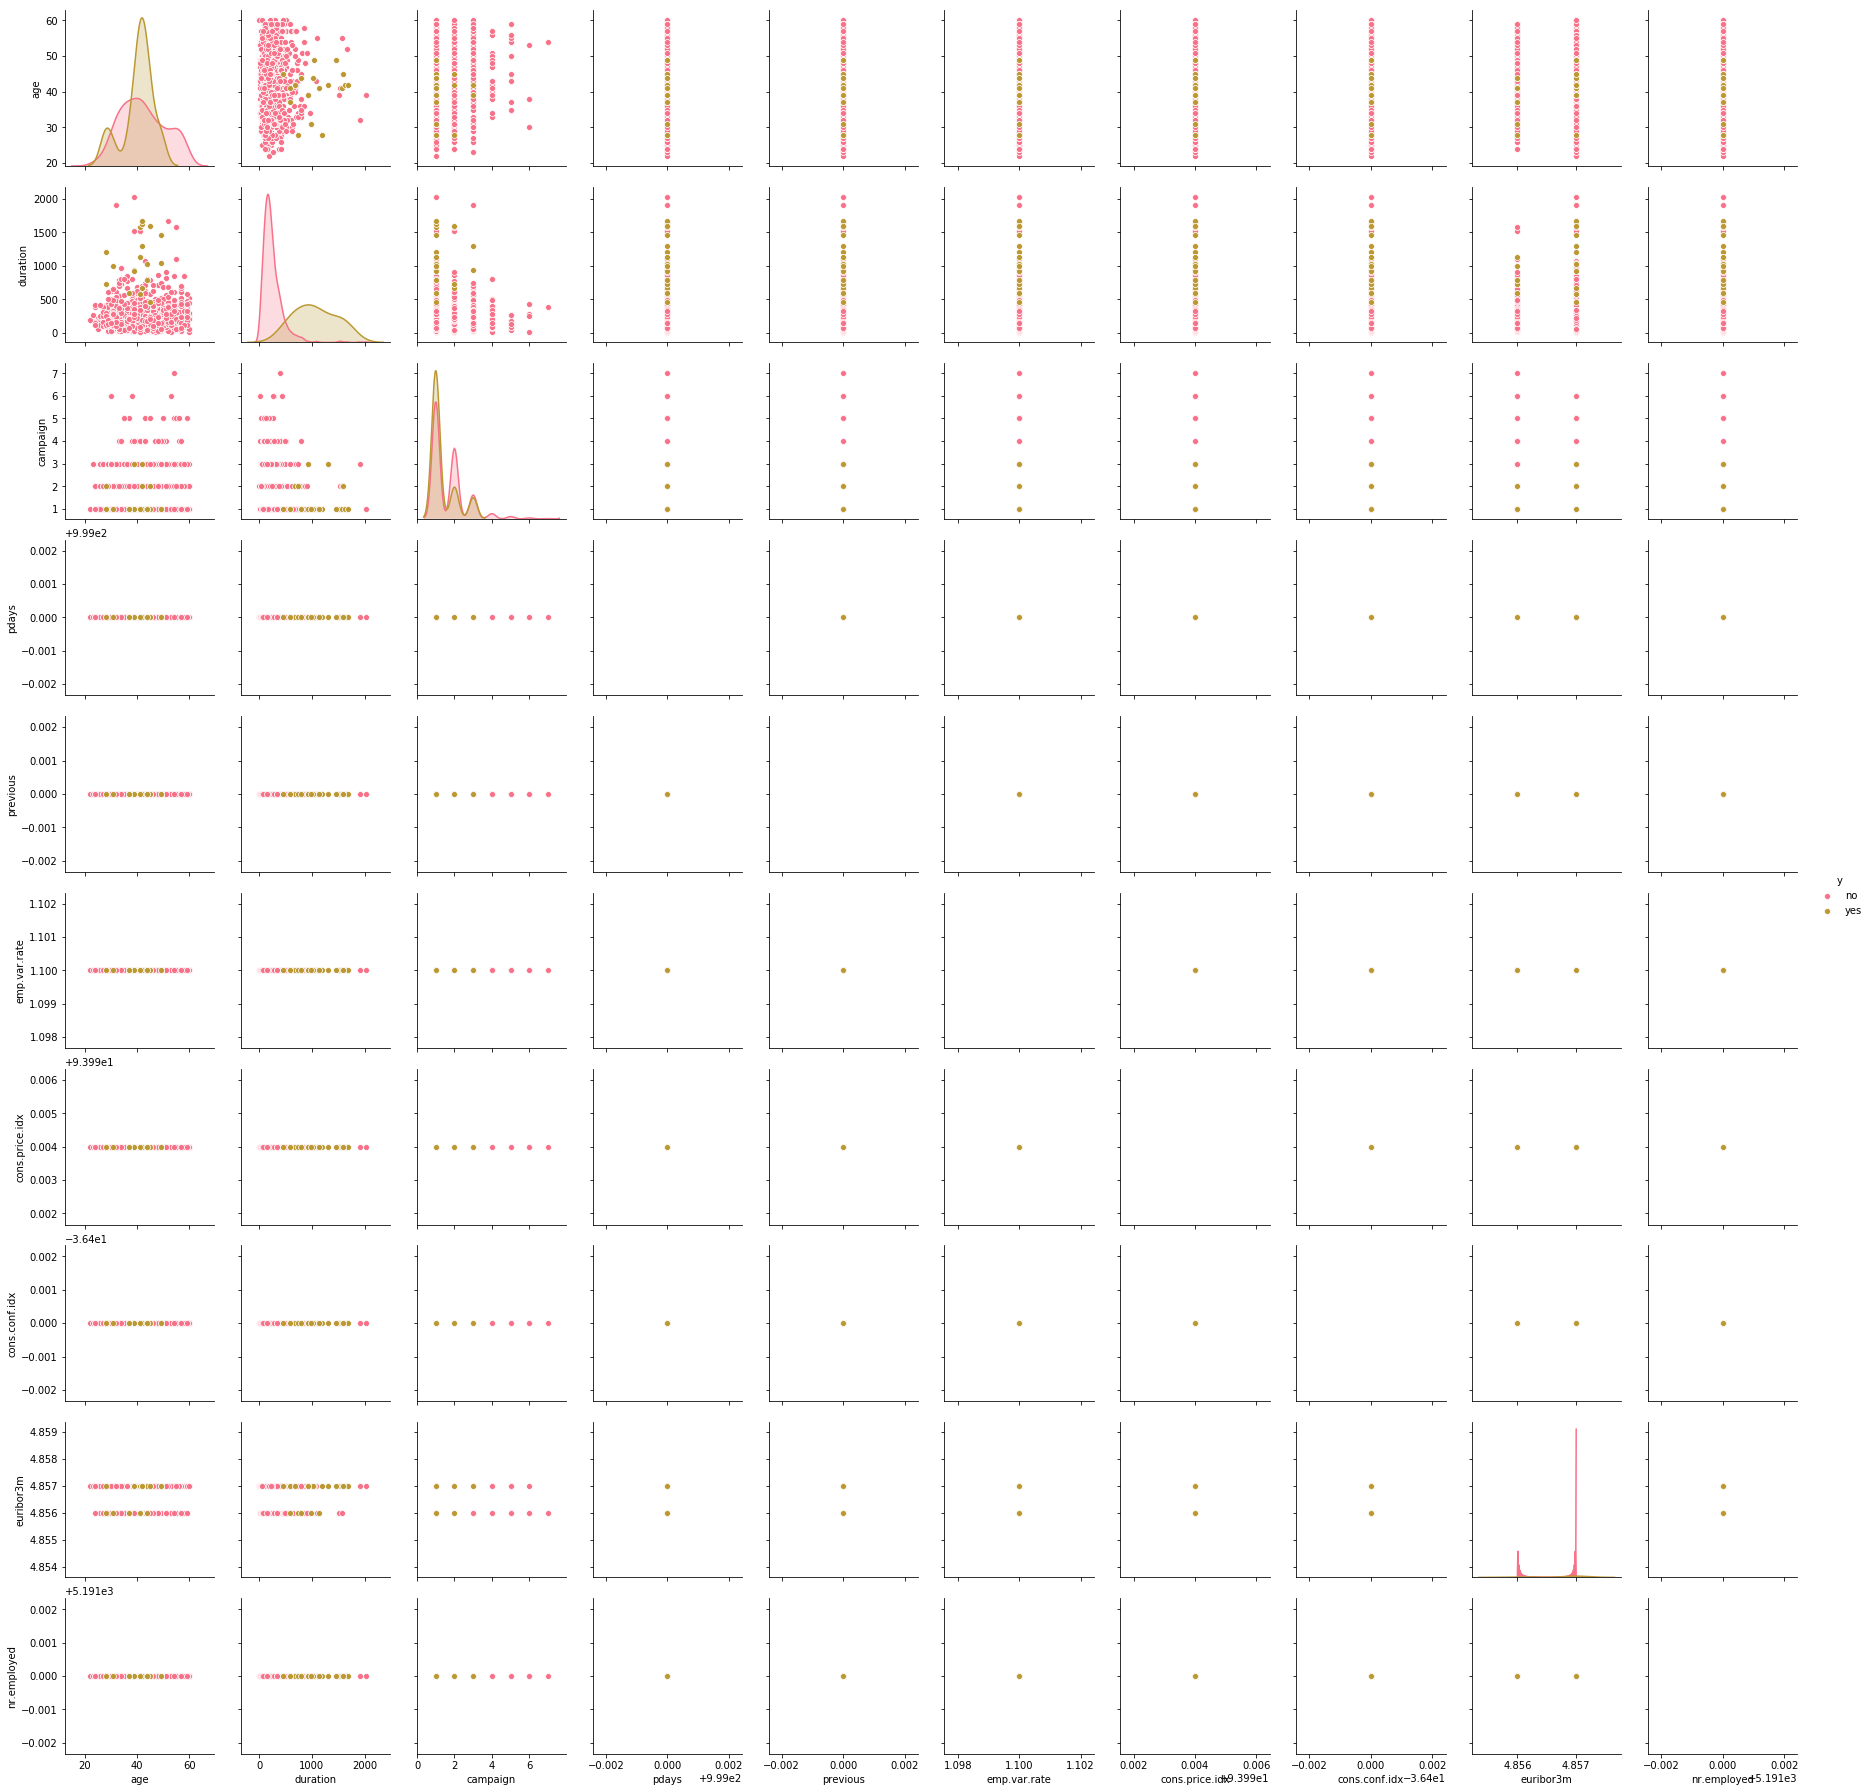

In [33]:
sns.pairplot(df,hue='y',
             palette = sns.color_palette("husl"), size=2.5)

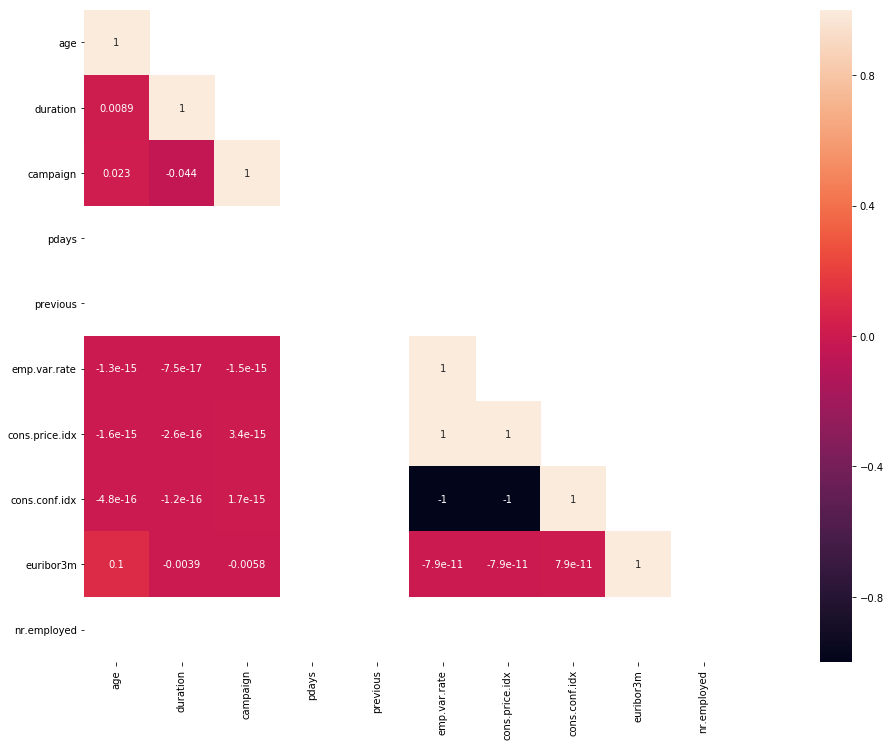

In [31]:
cor_mat= df.corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)

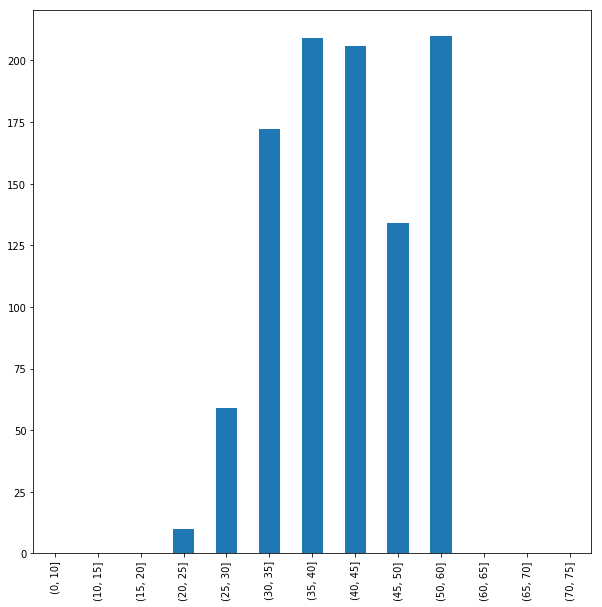

In [30]:
plt.figure(figsize=(10, 10))
bins=[0,10,15,20,25,30,35,40,45,50,60,65,70,75]
df['AgeBins']=pd.cut(df['age'],bins)
df['AgeBins'].value_counts().sort_index().plot.bar()

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


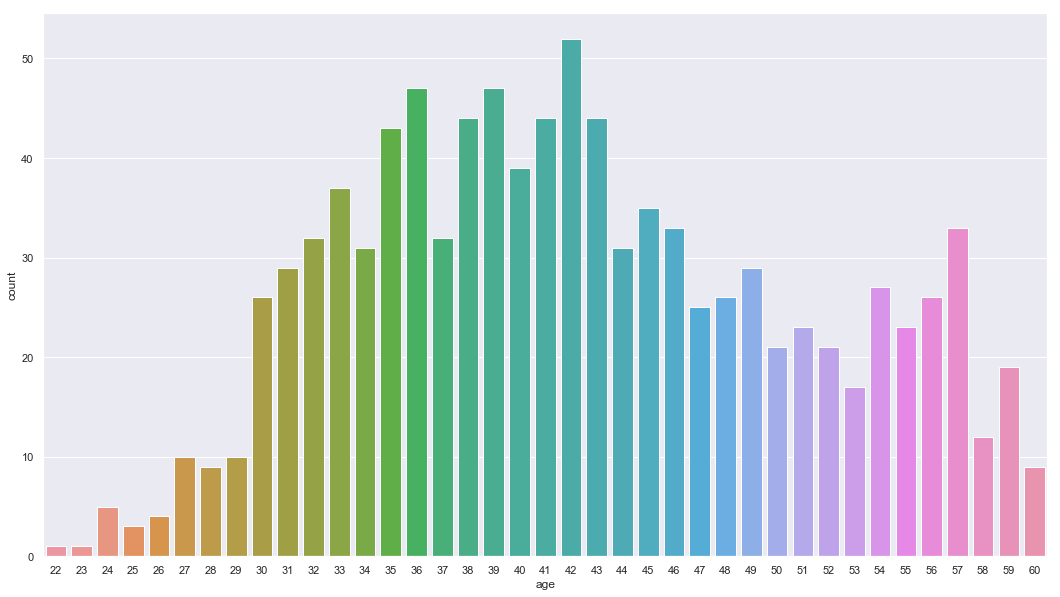

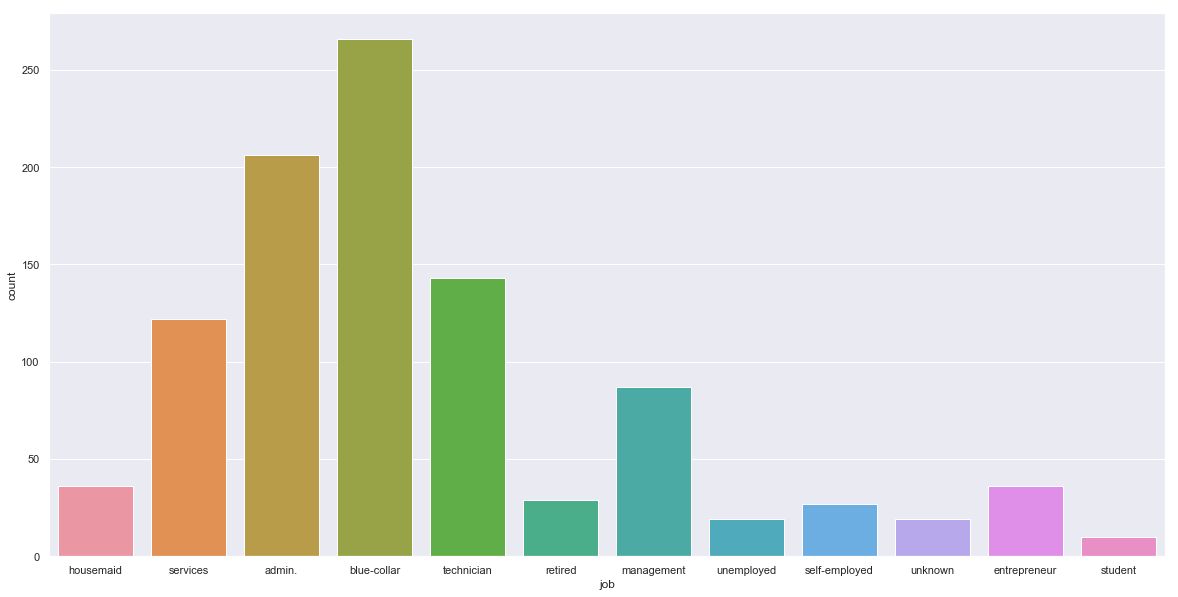

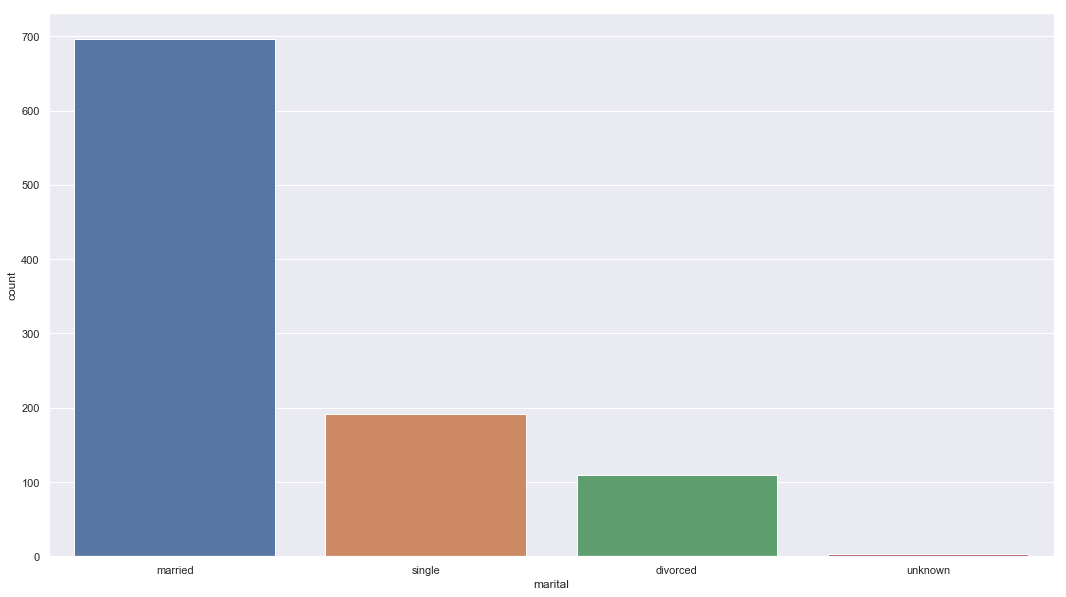

In [38]:
plt.figure(figsize=(18,10))
sns.set()
print(sns.countplot(df.age))
plt.figure(figsize=(20,10))
sns.set()
print(sns.countplot(df.job))
plt.figure(figsize=(18,10))
sns.set()
print(sns.countplot(df.marital))


AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


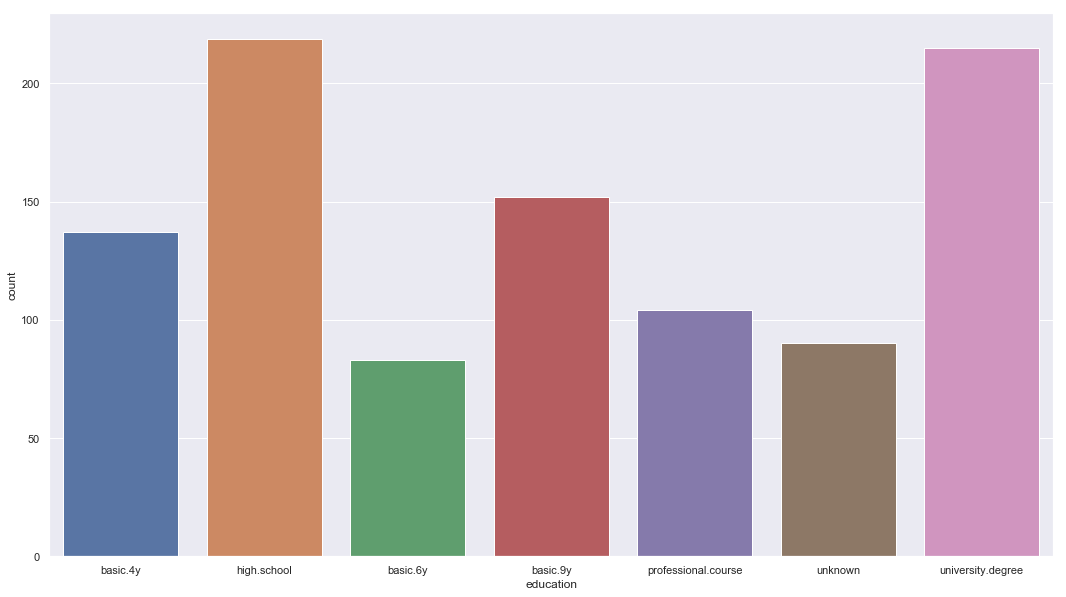

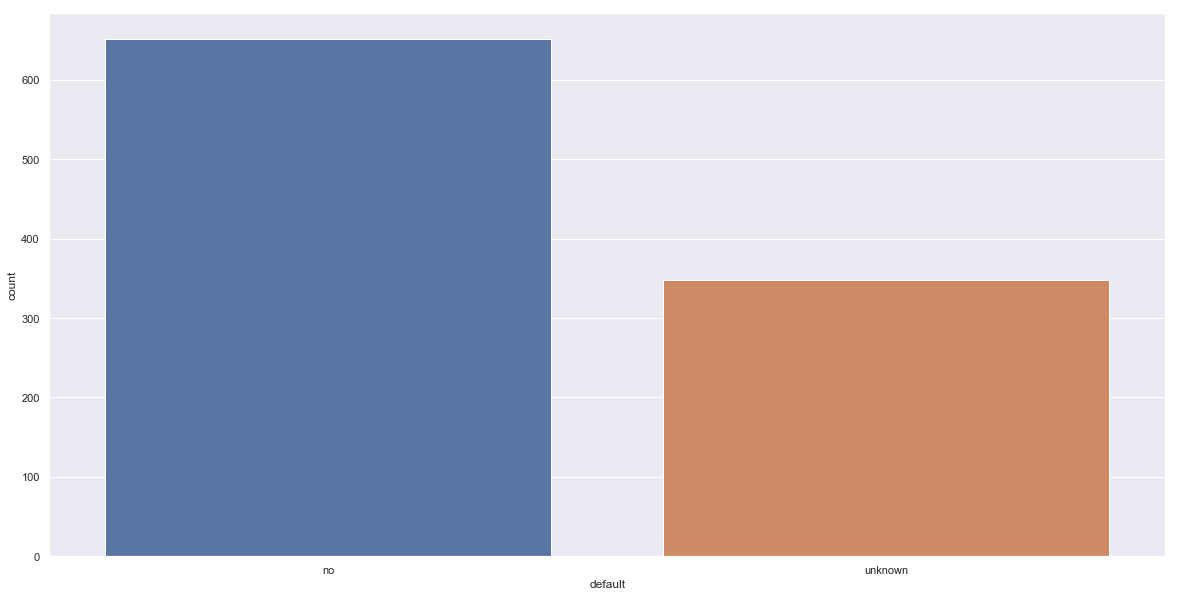

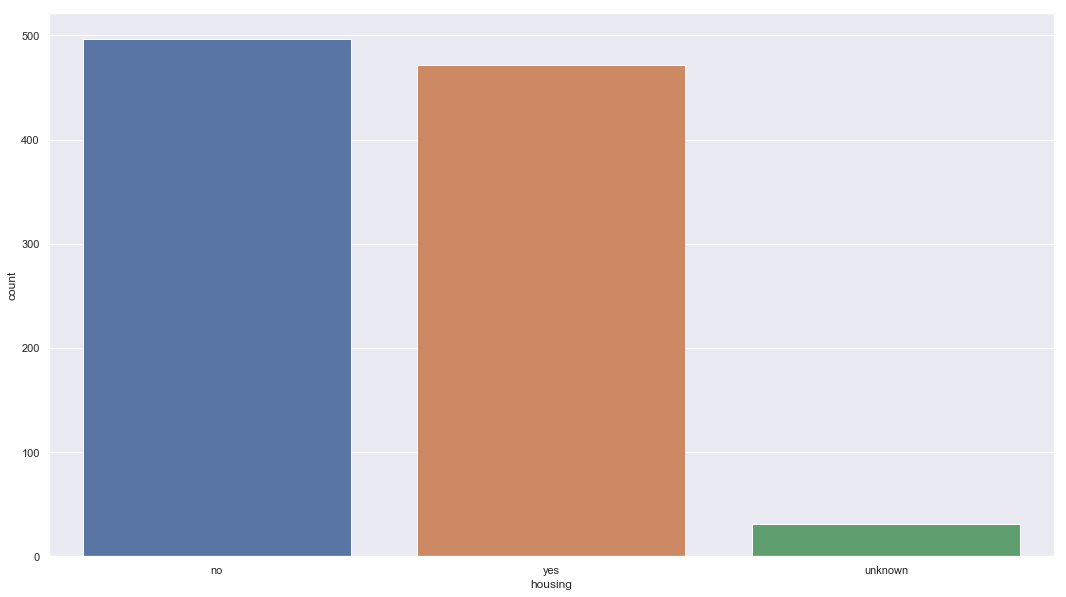

In [39]:
plt.figure(figsize=(18,10))
sns.set()
print(sns.countplot(df.education))
plt.figure(figsize=(20,10))
sns.set()
print(sns.countplot(df.default))
plt.figure(figsize=(18,10))
sns.set()
print(sns.countplot(df.housing))


AxesSubplot(0.125,0.125;0.775x0.755)


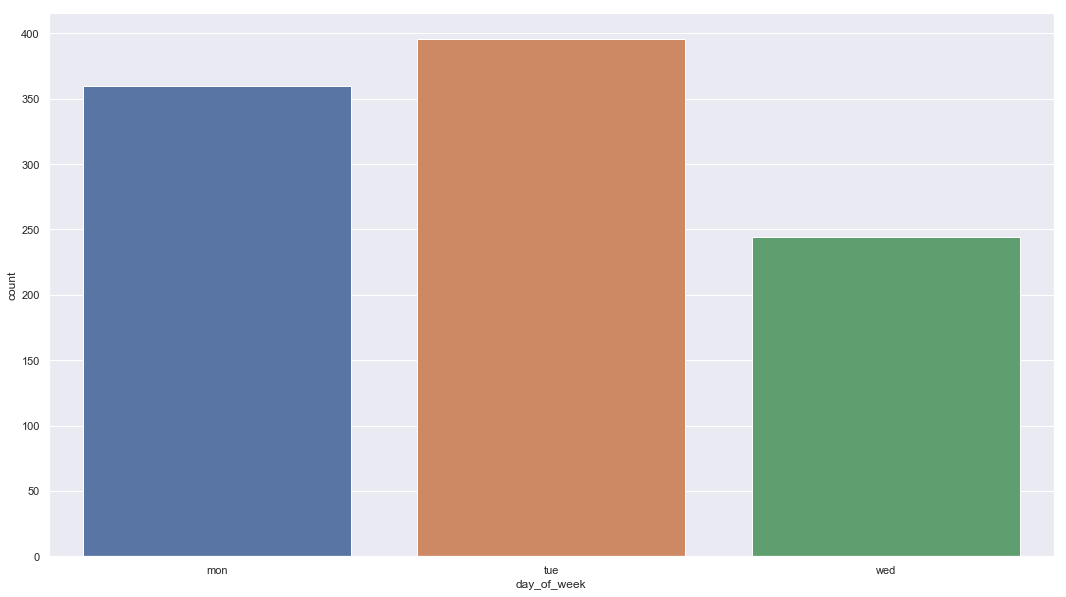

In [48]:

plt.figure(figsize=(18,10))
sns.set()
print(sns.countplot(df.day_of_week))


AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


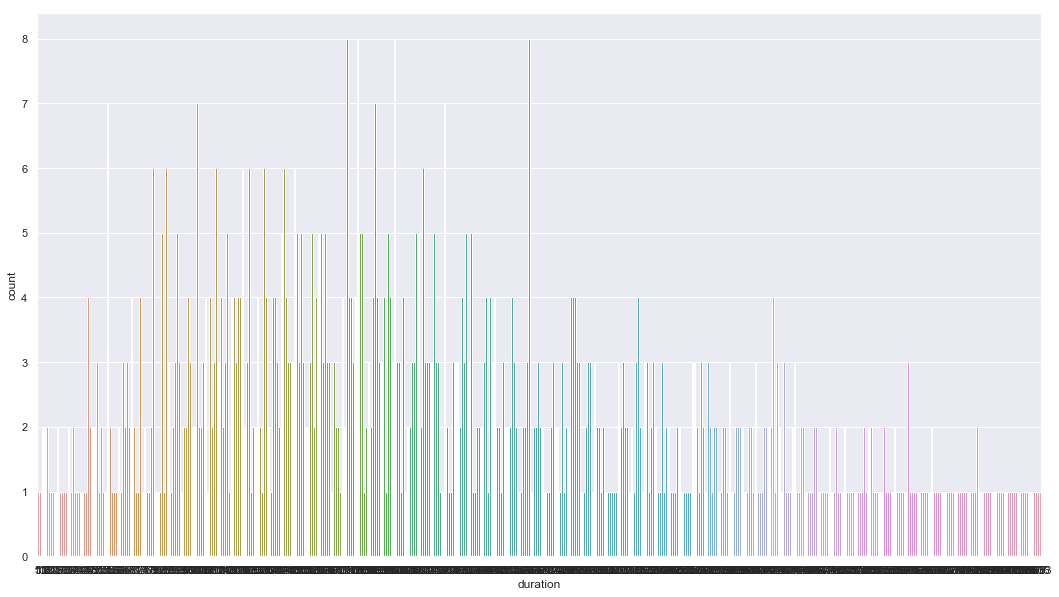

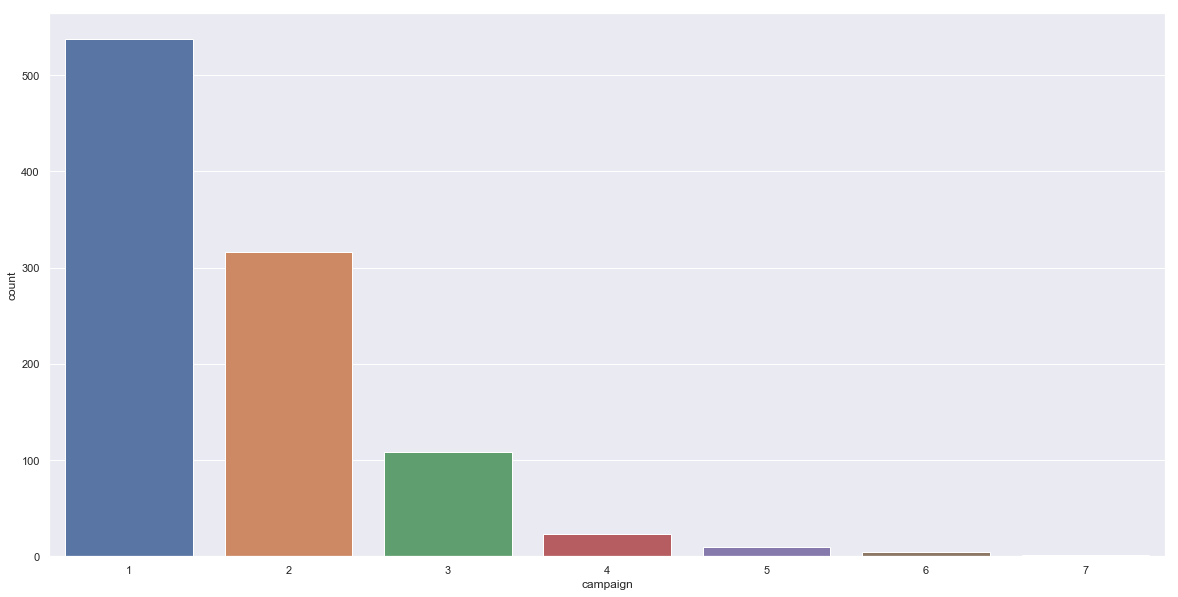

In [49]:
plt.figure(figsize=(18,10))
sns.set()
print(sns.countplot(df.duration))
plt.figure(figsize=(20,10))
sns.set()
print(sns.countplot(df.campaign))


AxesSubplot(0.125,0.125;0.775x0.755)


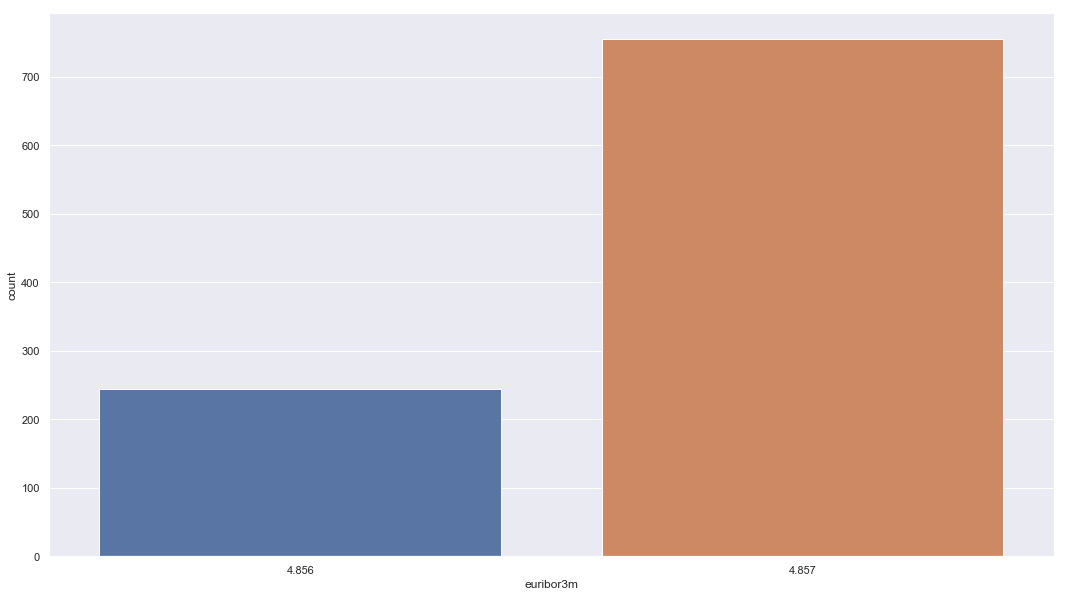

In [50]:
plt.figure(figsize=(18,10))
sns.set()
print(sns.countplot(df['euribor3m']))


AxesSubplot(0.125,0.125;0.775x0.755)


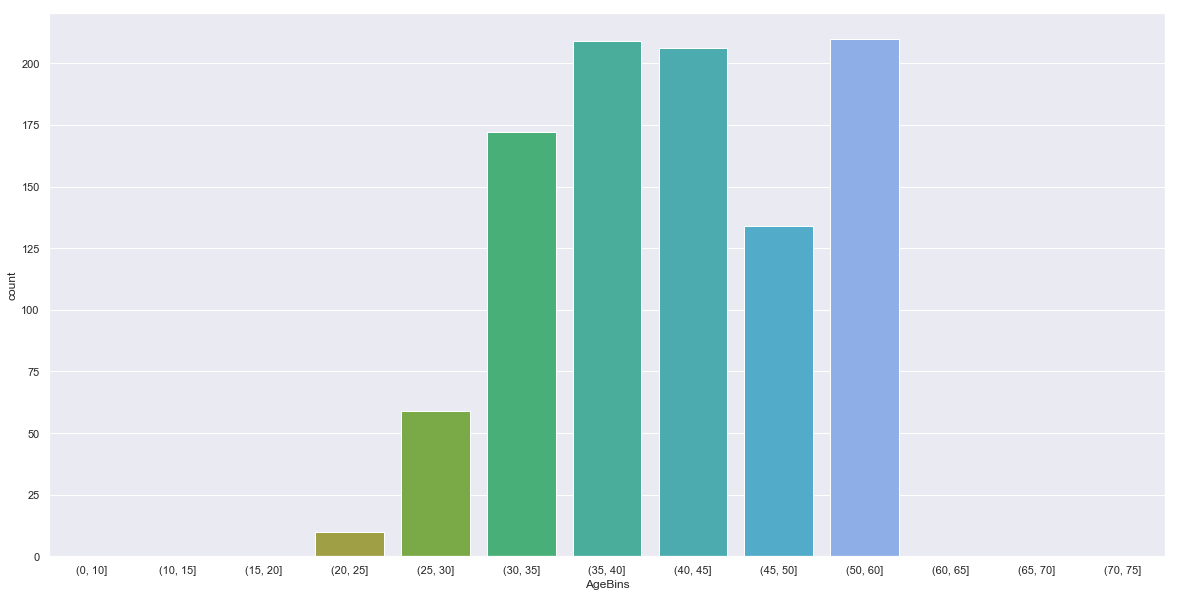

In [51]:
plt.figure(figsize=(20,10))
sns.set()
print(sns.countplot(df['AgeBins']))



In [54]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'day_of_week', 'duration', 'campaign', 'previous', 'poutcome',
       'emp.var.rate', 'euribor3m', 'y', 'AgeBins'],
      dtype='object')

In [53]:
df=df.drop(['nr.employed','cons.price.idx','cons.conf.idx','pdays','contact','month'],axis=1)

C:\Users\GT\Anaconda3\lib\site-packages\matplotlib\figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


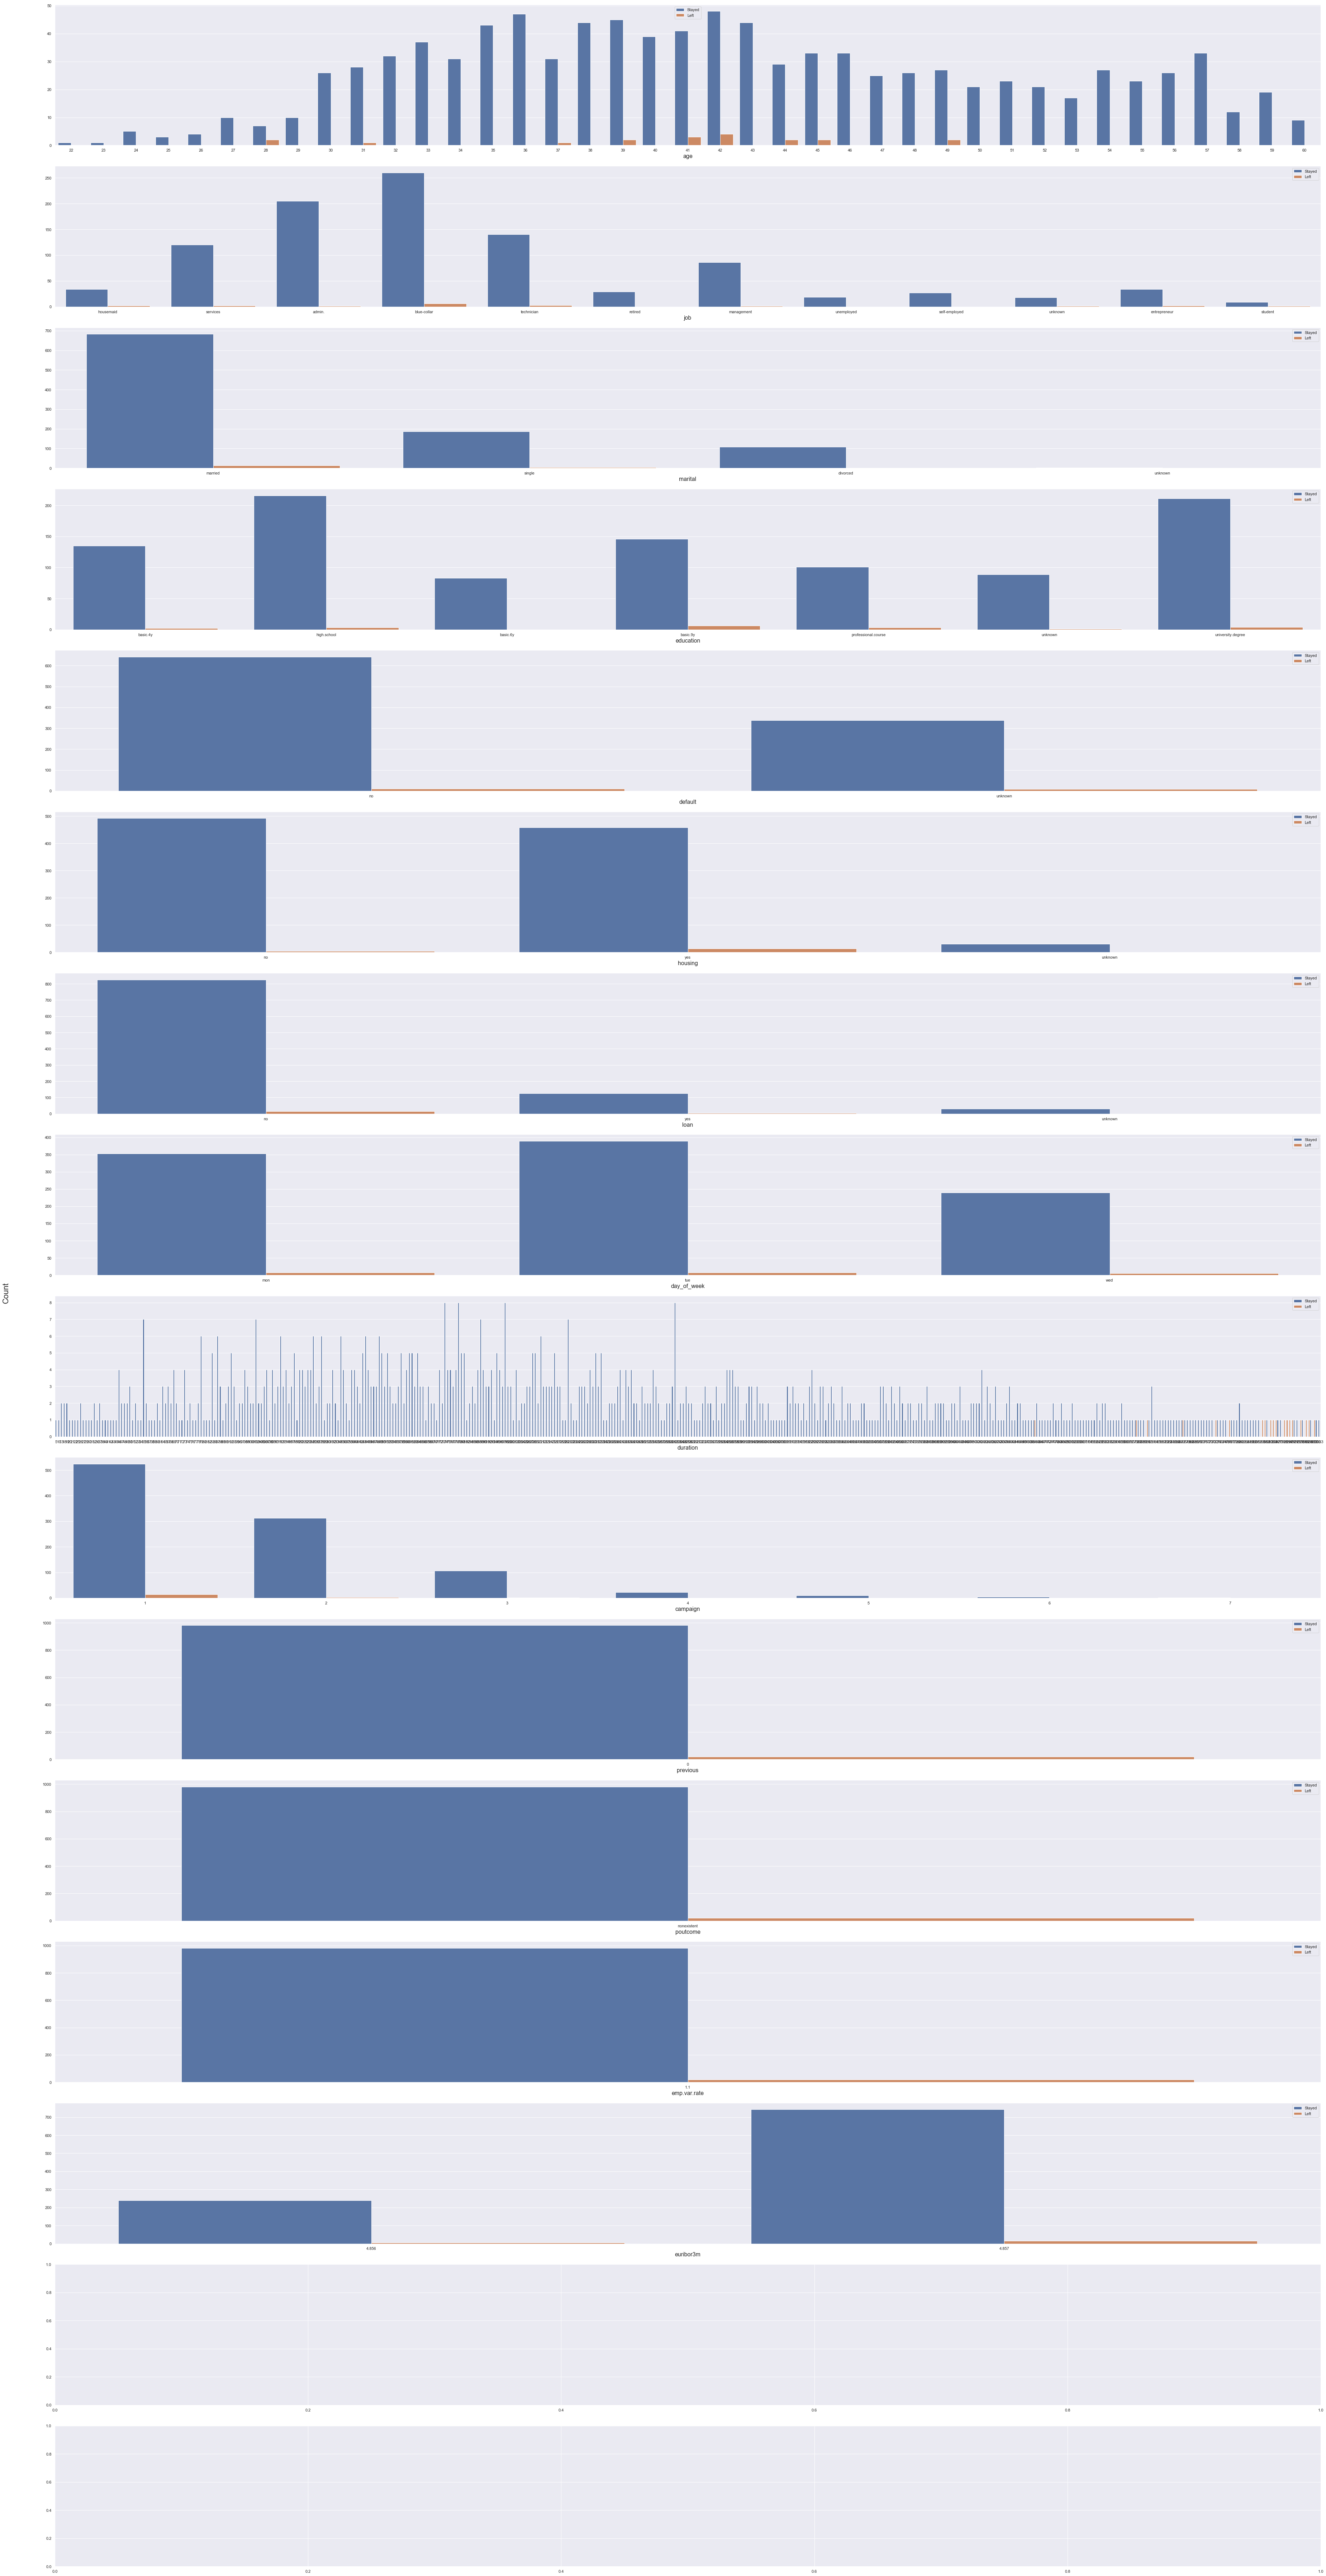

In [57]:
f, axes = plt.subplots(16, 1, figsize=(50,100), tight_layout=True)
x_vars = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'day_of_week', 'duration', 'campaign', 'previous', 'poutcome',
       'emp.var.rate', 'euribor3m']
for ax, x in zip(axes, x_vars):
    sns.countplot(x=x, hue='y', data=df, ax=ax)
    ax.set_xlabel(x, size=16)
    ax.set_ylabel("")
    ax.legend(['Stayed', 'Left'])

f.text(x=-0.0275, y=0.5, s='Count', rotation=90, size=22)
plt.show()

In [58]:
df.shape

(1000, 16)

In [59]:
array = df.values
X = array[:,0:-1]
Y = array[:,-1]

In [68]:
ct = ColumnTransformer([("encoder",OneHotEncoder(categories = "auto"),[6])], remainder = "passthrough")
X = np.array(ct.fit_transform(X))

In [69]:
from sklearn.preprocessing import LabelEncoder

df1= list(df.select_dtypes(include=['object']).columns)
label_encoder_feat = {}
for i, feature in enumerate(df1):
    label_encoder_feat[feature] = LabelEncoder()
    df[feature] = label_encoder_feat[feature].fit_transform(df[feature])

df.head()

,age,job,marital,education,default,housing,loan,day_of_week,duration,campaign,previous,poutcome,emp.var.rate,euribor3m,y,AgeBins
648,36,9,1,2,1,2,0,1,284,2,0,0,1.1,4.857,0,"(35, 40]"
171,36,7,1,3,1,0,0,0,427,1,0,0,1.1,4.857,0,"(35, 40]"
75,41,1,0,0,1,2,0,0,1575,1,0,0,1.1,4.857,1,"(40, 45]"
761,43,10,1,0,0,0,0,2,275,4,0,0,1.1,4.856,0,"(40, 45]"
433,27,7,2,4,0,2,2,1,271,1,0,0,1.1,4.857,0,"(25, 30]"


In [72]:
from sklearn.utils import shuffle
df = shuffle(df)

# Splitting the data set into train and test set
from sklearn.model_selection import train_test_split
features_ = df.drop(columns = ['y','AgeBins'])
target = df['y']

X_train, X_test, y_train, y_test = train_test_split(features_, target, test_size = 0.3,random_state = 0)


print ("Train data set size : ", X_train.shape)
print ("Test data set size : ", X_test.shape)

Train data set size :  (700, 14)
Test data set size :  (300, 14)


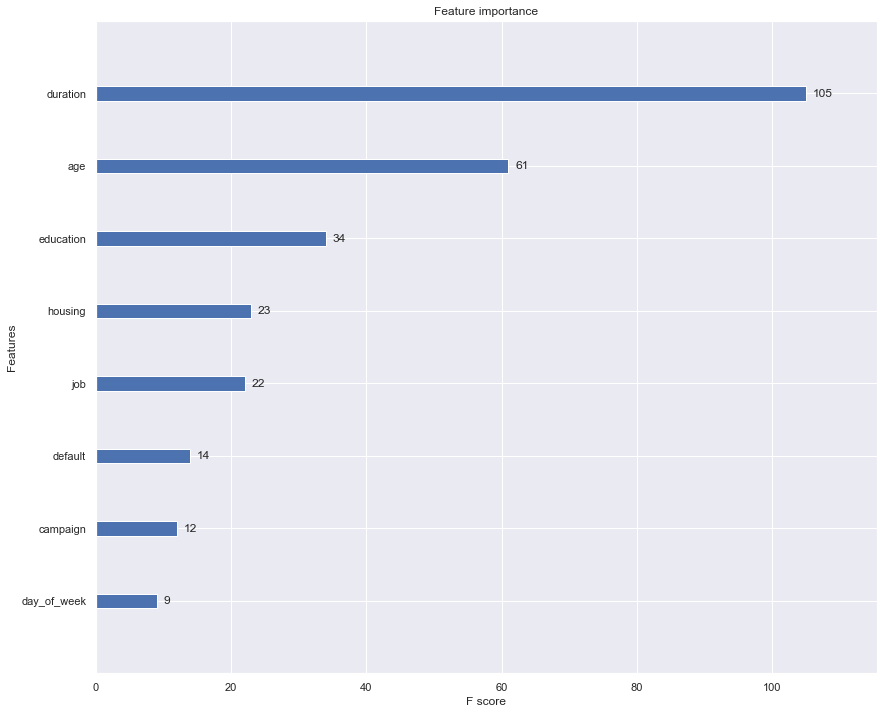

In [73]:
from xgboost import XGBClassifier
from xgboost import plot_importance

# Training the model
model = XGBClassifier()
model_importance = model.fit(X_train, y_train)

# Plotting the Feature importance bar graph
plt.rcParams['figure.figsize'] = [14,12]
sns.set(style = 'darkgrid')
plot_importance(model_importance);

In [75]:
pred = model_importance.predict(X_test)

print ("The accuracy of model 3 : ",accuracy_score(y_test, pred))
print ("The f1 score of model 3 : ", f1_score(y_test, pred, average = 'binary'))

The accuracy of model 3 :  0.9866666666666667
The f1 score of model 3 :  0.3333333333333333


In [76]:
print("Confusion Matrix on Test Data")
pd.crosstab(y_test, pred, rownames=['True'], colnames=['Predicted'], margins=True)

Confusion Matrix on Test Data


Predicted,0,1,All
True,,,
0,295,2,297
1,2,1,3
All,297,3,300
